## 1. Importación y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

print("Librerías importadas")

Librerías importadas


In [2]:
# Función helper para cargar datos
def load_experiment_data(results_dir, label):
    """Carga datos de experimentos desde un directorio."""
    csv_files = [f for f in results_dir.glob('*.csv') if 'd3' in f.name]
    
    data_summary = []
    for filepath in csv_files:
        df_temp = pd.read_csv(filepath)
        
        # Extraer nombre del experimento
        name = filepath.stem.rsplit('_', 1)[0]  # Remover timestamp
        
        summary = {
            'name': name,
            'algorithm': df_temp['algorithm'].iloc[0],
            'heuristic': df_temp['heuristic'].iloc[0],
            'config': df_temp['config'].iloc[0],
            'alpha_beta': df_temp['alpha_beta'].iloc[0] if 'alpha_beta' in df_temp.columns else False,
            'depth': df_temp['depth'].iloc[0],
            'max_tile_mean': df_temp['max_tile'].mean(),
            'max_tile_std': df_temp['max_tile'].std(),
            'score_mean': df_temp['final_score'].mean(),
            'score_std': df_temp['final_score'].std(),
            'moves_mean': df_temp['moves'].mean(),
            'moves_std': df_temp['moves'].std(),
            'time_mean': df_temp['time_seconds'].mean(),
            'time_std': df_temp['time_seconds'].std(),
            'nodes_mean': df_temp['nodes_explored'].mean(),
            'nodes_std': df_temp['nodes_explored'].std(),
            'avg_time_per_move_mean': df_temp['avg_time_per_move'].mean(),
            'avg_time_per_move_std': df_temp['avg_time_per_move'].std(),
            'win_rate': df_temp['won'].mean() * 100,
            'games': len(df_temp),
            'source': label
        }
        data_summary.append(summary)
    
    return pd.DataFrame(data_summary)

# Cargar datos Long (20 partidas)
long_dir = Path('results/long')
df_long = load_experiment_data(long_dir, 'Long (20 partidas)')

# Cargar datos Optimized (5 partidas)
optimized_dir = Path('results/optimized')
df_optimized = load_experiment_data(optimized_dir, 'Optimized (5 partidas)')

print(f"Long: {len(df_long)} experimentos, {df_long['games'].sum()} partidas totales")
print(f"Optimized: {len(df_optimized)} experimentos, {df_optimized['games'].sum()} partidas totales")
print(f"\nExperimentos Long:")
display(df_long[['name', 'algorithm', 'heuristic', 'config', 'alpha_beta', 'games']])
print(f"\nExperimentos Optimized:")
display(df_optimized[['name', 'algorithm', 'heuristic', 'config', 'alpha_beta', 'games']])

Long: 8 experimentos, 160 partidas totales
Optimized: 6 experimentos, 30 partidas totales

Experimentos Long:


,name,algorithm,heuristic,config,alpha_beta,games
0,Expectimax_simple_c1_d3_20251214,expectimax,simple,1,False,20
1,Expectimax_simple_c2_d3_20251214,expectimax,simple,2,False,20
2,Minimax_AB_intermediate_c1_d3_20251215,minimax,intermediate,1,True,20
3,Minimax_AB_simple_c1_d3_20251214,minimax,simple,1,True,20
4,Minimax_AB_simple_c2_d3_20251214,minimax,simple,2,True,20
5,Minimax_NoAB_intermediate_c1_d3_20251215,minimax,intermediate,1,False,20
6,Minimax_NoAB_simple_c1_d3_20251214,minimax,simple,1,False,20
7,Minimax_NoAB_simple_c2_d3_20251214,minimax,simple,2,False,20



Experimentos Optimized:


,name,algorithm,heuristic,config,alpha_beta,games
0,Expectimax_simple_c1_d3_20251215,expectimax,simple,1,False,5
1,Expectimax_simple_c2_d3_20251215,expectimax,simple,2,False,5
2,Minimax_AB_simple_c1_d3_20251215,minimax,simple,1,True,5
3,Minimax_AB_simple_c2_d3_20251215,minimax,simple,2,True,5
4,Minimax_NoAB_simple_c1_d3_20251215,minimax,simple,1,False,5
5,Minimax_NoAB_simple_c2_d3_20251215,minimax,simple,2,False,5


## 2. Identificar Experimentos Comparables

Buscar experimentos con la misma configuración en ambos conjuntos (Long vs Optimized)

In [3]:
# Crear clave de comparación
df_long['compare_key'] = (
    df_long['algorithm'] + '_' + 
    df_long['alpha_beta'].astype(str) + '_' +
    df_long['heuristic'] + '_' +
    df_long['config'].astype(str)
)

df_optimized['compare_key'] = (
    df_optimized['algorithm'] + '_' + 
    df_optimized['alpha_beta'].astype(str) + '_' +
    df_optimized['heuristic'] + '_' +
    df_optimized['config'].astype(str)
)

# Encontrar experimentos en común
common_keys = set(df_long['compare_key']) & set(df_optimized['compare_key'])

print(f"Experimentos comparables encontrados: {len(common_keys)}")
for key in sorted(common_keys):
    long_name = df_long[df_long['compare_key'] == key]['name'].iloc[0]
    opt_name = df_optimized[df_optimized['compare_key'] == key]['name'].iloc[0]
    print(f"   - {key}")
    print(f"     Long: {long_name}")
    print(f"     Optimized: {opt_name}")

Experimentos comparables encontrados: 6
   - expectimax_False_simple_1
     Long: Expectimax_simple_c1_d3_20251214
     Optimized: Expectimax_simple_c1_d3_20251215
   - expectimax_False_simple_2
     Long: Expectimax_simple_c2_d3_20251214
     Optimized: Expectimax_simple_c2_d3_20251215
   - minimax_False_simple_1
     Long: Minimax_NoAB_simple_c1_d3_20251214
     Optimized: Minimax_NoAB_simple_c1_d3_20251215
   - minimax_False_simple_2
     Long: Minimax_NoAB_simple_c2_d3_20251214
     Optimized: Minimax_NoAB_simple_c2_d3_20251215
   - minimax_True_simple_1
     Long: Minimax_AB_simple_c1_d3_20251214
     Optimized: Minimax_AB_simple_c1_d3_20251215
   - minimax_True_simple_2
     Long: Minimax_AB_simple_c2_d3_20251214
     Optimized: Minimax_AB_simple_c2_d3_20251215


## 3. Comparaciones Visuales

### 3.1 Comparación Global: Todas las Métricas

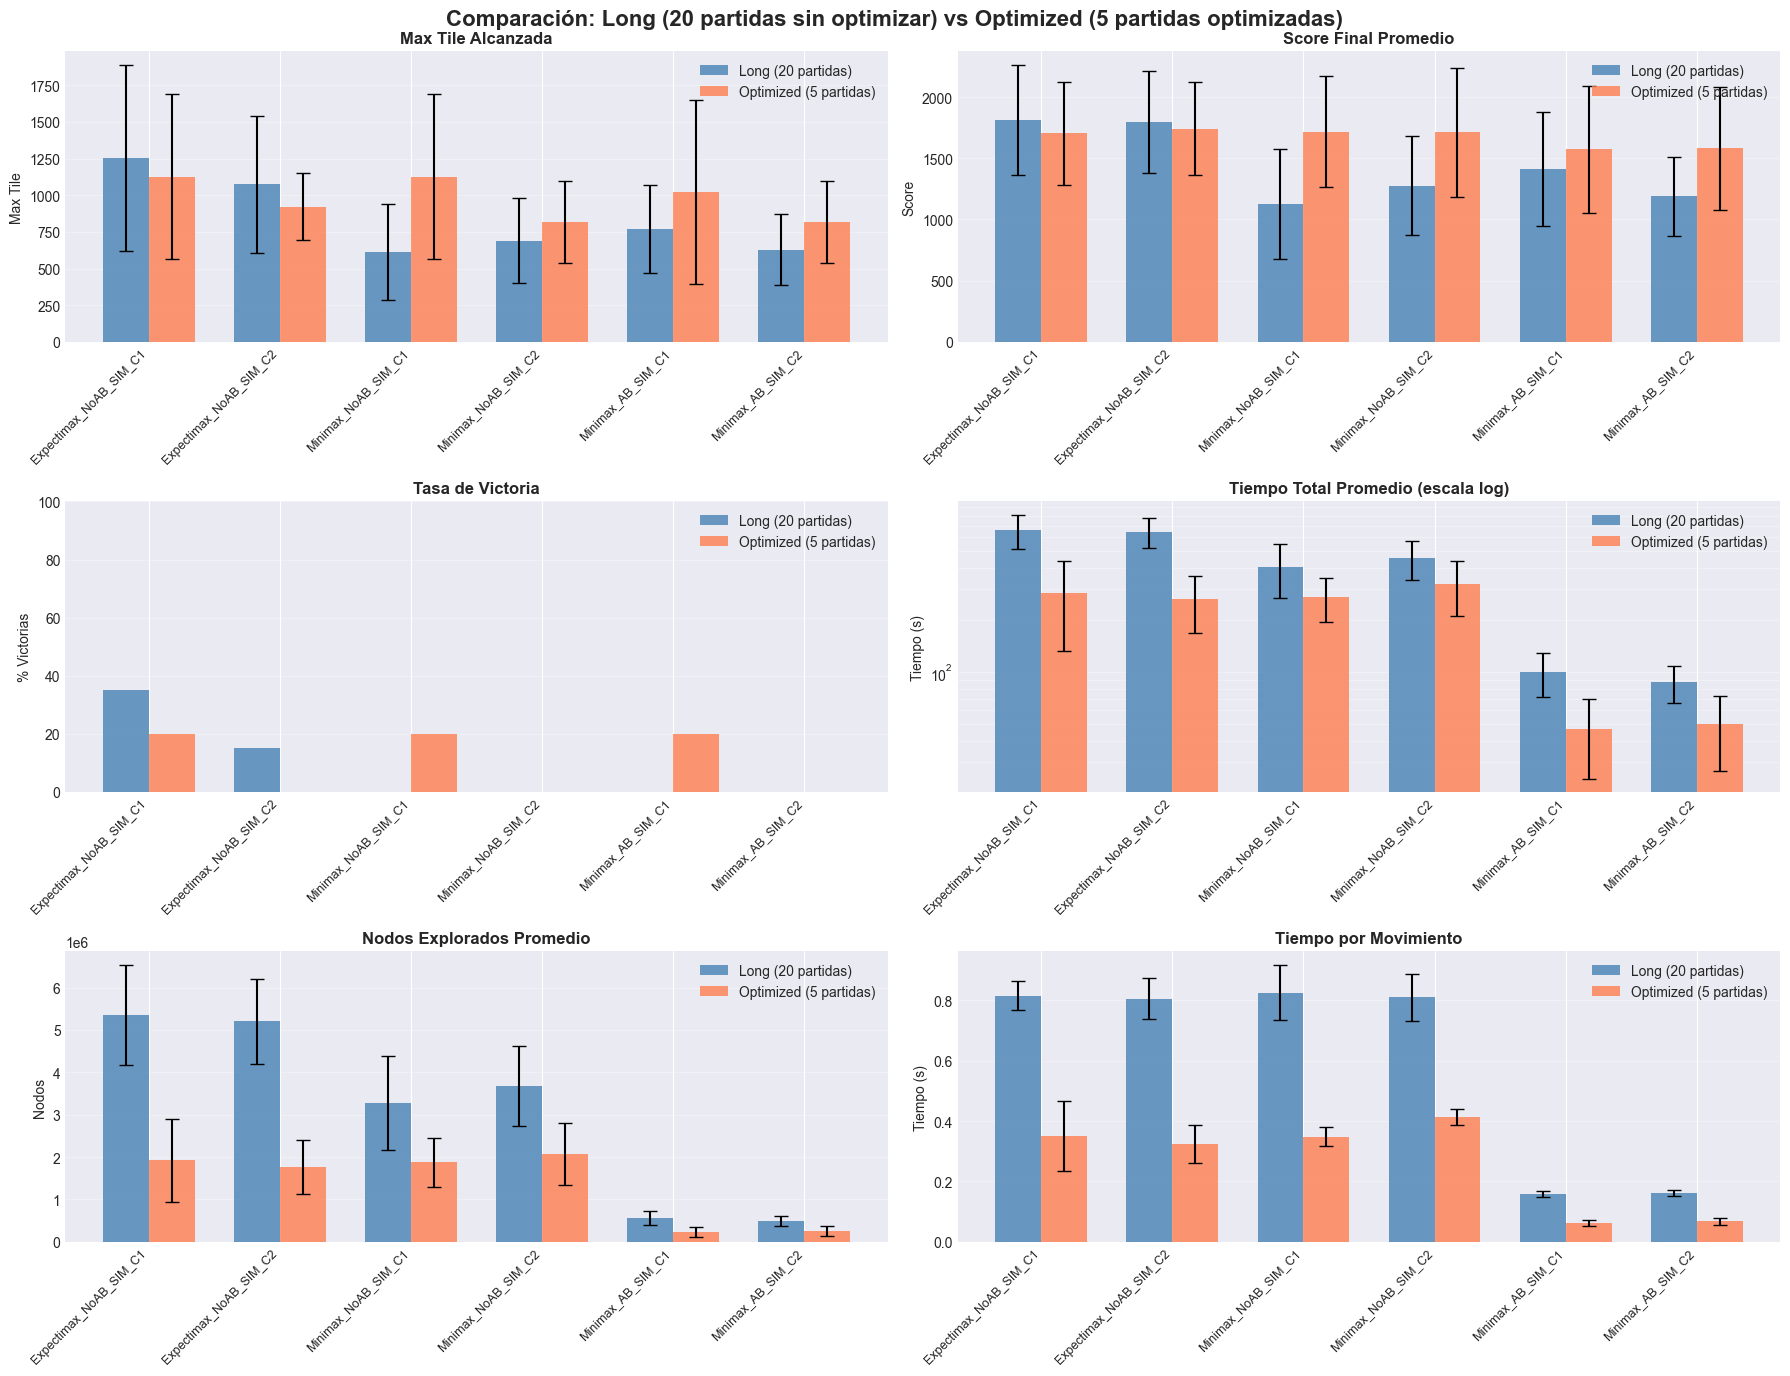

Comparación Long vs Optimized generada


In [4]:
# Filtrar solo experimentos comparables
df_long_comp = df_long[df_long['compare_key'].isin(common_keys)].copy()
df_optimized_comp = df_optimized[df_optimized['compare_key'].isin(common_keys)].copy()

# Ordenar por compare_key para alinearlos
df_long_comp = df_long_comp.sort_values('compare_key').reset_index(drop=True)
df_optimized_comp = df_optimized_comp.sort_values('compare_key').reset_index(drop=True)

# Crear etiquetas descriptivas
labels = []
for idx, row in df_long_comp.iterrows():
    algo = 'Minimax' if row['algorithm'] == 'minimax' else 'Expectimax'
    ab = 'AB' if row['alpha_beta'] else 'NoAB'
    heur = row['heuristic'][:3].upper()
    conf = f"C{row['config']}"
    labels.append(f"{algo}_{ab}_{heur}_{conf}")

# Visualización comparativa
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = axes.flatten()

x = np.arange(len(labels))
width = 0.35

# 1. Max Tile
axes[0].bar(x - width/2, df_long_comp['max_tile_mean'], width, 
           yerr=df_long_comp['max_tile_std'], label='Long (20 partidas)', 
           alpha=0.8, color='steelblue', capsize=5)
axes[0].bar(x + width/2, df_optimized_comp['max_tile_mean'], width, 
           yerr=df_optimized_comp['max_tile_std'], label='Optimized (5 partidas)', 
           alpha=0.8, color='coral', capsize=5)
axes[0].set_title('Max Tile Alcanzada', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Max Tile')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Score Final
axes[1].bar(x - width/2, df_long_comp['score_mean'], width, 
           yerr=df_long_comp['score_std'], label='Long (20 partidas)', 
           alpha=0.8, color='steelblue', capsize=5)
axes[1].bar(x + width/2, df_optimized_comp['score_mean'], width, 
           yerr=df_optimized_comp['score_std'], label='Optimized (5 partidas)', 
           alpha=0.8, color='coral', capsize=5)
axes[1].set_title('Score Final Promedio', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Tasa de Victoria
axes[2].bar(x - width/2, df_long_comp['win_rate'], width, 
           label='Long (20 partidas)', alpha=0.8, color='steelblue')
axes[2].bar(x + width/2, df_optimized_comp['win_rate'], width, 
           label='Optimized (5 partidas)', alpha=0.8, color='coral')
axes[2].set_title('Tasa de Victoria', fontweight='bold', fontsize=12)
axes[2].set_ylabel('% Victorias')
axes[2].set_ylim([0, 100])
axes[2].set_xticks(x)
axes[2].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

# 4. Tiempo Total (escala logarítmica para mejor visualización)
axes[3].bar(x - width/2, df_long_comp['time_mean'], width, 
           yerr=df_long_comp['time_std'], label='Long (20 partidas)', 
           alpha=0.8, color='steelblue', capsize=5)
axes[3].bar(x + width/2, df_optimized_comp['time_mean'], width, 
           yerr=df_optimized_comp['time_std'], label='Optimized (5 partidas)', 
           alpha=0.8, color='coral', capsize=5)
axes[3].set_title('Tiempo Total Promedio (escala log)', fontweight='bold', fontsize=12)
axes[3].set_ylabel('Tiempo (s)')
axes[3].set_yscale('log')
axes[3].set_xticks(x)
axes[3].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[3].legend()
axes[3].grid(axis='y', alpha=0.3, which='both')

# 5. Nodos Explorados
axes[4].bar(x - width/2, df_long_comp['nodes_mean'], width, 
           yerr=df_long_comp['nodes_std'], label='Long (20 partidas)', 
           alpha=0.8, color='steelblue', capsize=5)
axes[4].bar(x + width/2, df_optimized_comp['nodes_mean'], width, 
           yerr=df_optimized_comp['nodes_std'], label='Optimized (5 partidas)', 
           alpha=0.8, color='coral', capsize=5)
axes[4].set_title('Nodos Explorados Promedio', fontweight='bold', fontsize=12)
axes[4].set_ylabel('Nodos')
axes[4].set_xticks(x)
axes[4].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[4].legend()
axes[4].grid(axis='y', alpha=0.3)
axes[4].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 6. Tiempo por Movimiento
axes[5].bar(x - width/2, df_long_comp['avg_time_per_move_mean'], width, 
           yerr=df_long_comp['avg_time_per_move_std'], label='Long (20 partidas)', 
           alpha=0.8, color='steelblue', capsize=5)
axes[5].bar(x + width/2, df_optimized_comp['avg_time_per_move_mean'], width, 
           yerr=df_optimized_comp['avg_time_per_move_std'], label='Optimized (5 partidas)', 
           alpha=0.8, color='coral', capsize=5)
axes[5].set_title('Tiempo por Movimiento', fontweight='bold', fontsize=12)
axes[5].set_ylabel('Tiempo (s)')
axes[5].set_xticks(x)
axes[5].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[5].legend()
axes[5].grid(axis='y', alpha=0.3)

fig.suptitle('Comparación: Long (20 partidas sin optimizar) vs Optimized (5 partidas optimizadas)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('results/comparison_long_vs_optimized.png', dpi=300, bbox_inches='tight')
plt.show()
print("Comparación Long vs Optimized generada")

### 3.2 Análisis de Mejoras Porcentuales

In [5]:
# Calcular mejoras porcentuales
comparison_df = pd.DataFrame({
    'Experimento': labels,
    'Max Tile Long': df_long_comp['max_tile_mean'].values,
    'Max Tile Opt': df_optimized_comp['max_tile_mean'].values,
    'Score Long': df_long_comp['score_mean'].values,
    'Score Opt': df_optimized_comp['score_mean'].values,
    'Tiempo Long': df_long_comp['time_mean'].values,
    'Tiempo Opt': df_optimized_comp['time_mean'].values,
    'Nodos Long': df_long_comp['nodes_mean'].values,
    'Nodos Opt': df_optimized_comp['nodes_mean'].values,
})

# Calcular cambios porcentuales
comparison_df['Δ Max Tile (%)'] = ((comparison_df['Max Tile Opt'] - comparison_df['Max Tile Long']) / comparison_df['Max Tile Long'] * 100).round(1)
comparison_df['Δ Score (%)'] = ((comparison_df['Score Opt'] - comparison_df['Score Long']) / comparison_df['Score Long'] * 100).round(1)
comparison_df['Δ Tiempo (%)'] = ((comparison_df['Tiempo Opt'] - comparison_df['Tiempo Long']) / comparison_df['Tiempo Long'] * 100).round(1)
comparison_df['Δ Nodos (%)'] = ((comparison_df['Nodos Opt'] - comparison_df['Nodos Long']) / comparison_df['Nodos Long'] * 100).round(1)

# Reducción de tiempo (valor absoluto)
comparison_df['Reducción Tiempo (s)'] = (comparison_df['Tiempo Long'] - comparison_df['Tiempo Opt']).round(1)
comparison_df['Reducción Nodos'] = (comparison_df['Nodos Long'] - comparison_df['Nodos Opt']).round(0).astype(int)

print("ANÁLISIS DE MEJORAS: OPTIMIZED vs LONG")
print("=" * 150)
display(comparison_df[[
    'Experimento', 
    'Δ Max Tile (%)', 'Δ Score (%)', 
    'Δ Tiempo (%)', 'Reducción Tiempo (s)',
    'Δ Nodos (%)', 'Reducción Nodos'
]])

# Resumen estadístico
print("\nRESUMEN DE MEJORAS PROMEDIO")
print("=" * 150)
print(f"\nCalidad de Juego:")
print(f"   Cambio en Max Tile: {comparison_df['Δ Max Tile (%)'].mean():.1f}% (promedio)")
print(f"   Cambio en Score: {comparison_df['Δ Score (%)'].mean():.1f}% (promedio)")

print(f"\nEficiencia:")
print(f"   Reducción de Tiempo: {comparison_df['Δ Tiempo (%)'].mean():.1f}% (promedio)")
print(f"   Reducción de Nodos: {comparison_df['Δ Nodos (%)'].mean():.1f}% (promedio)")
print(f"   Tiempo ahorrado: {comparison_df['Reducción Tiempo (s)'].mean():.1f}s por partida (promedio)")

ANÁLISIS DE MEJORAS: OPTIMIZED vs LONG


,Experimento,Δ Max Tile (%),Δ Score (%),Δ Tiempo (%),Reducción Tiempo (s),Δ Nodos (%),Reducción Nodos
0,Expectimax_NoAB_SIM_C1,-10.20,-6.00,-57.20,380.00,-64.10,3424983
1,Expectimax_NoAB_SIM_C2,-14.30,-3.10,-59.40,384.80,-66.00,3432225
2,Minimax_NoAB_SIM_C1,83.30,52.90,-33.10,134.50,-42.80,1402536
3,Minimax_NoAB_SIM_C2,18.50,34.00,-29.00,132.40,-43.40,1595236
4,Minimax_AB_SIM_C1,33.30,11.50,-53.30,53.10,-57.90,331372
5,Minimax_AB_SIM_C2,30.60,32.90,-42.80,37.20,-49.70,247813



RESUMEN DE MEJORAS PROMEDIO

Calidad de Juego:
   Cambio en Max Tile: 23.5% (promedio)
   Cambio en Score: 20.4% (promedio)

Eficiencia:
   Reducción de Tiempo: -45.8% (promedio)
   Reducción de Nodos: -54.0% (promedio)
   Tiempo ahorrado: 187.0s por partida (promedio)


### 3.3 Visualización de Mejoras Porcentuales

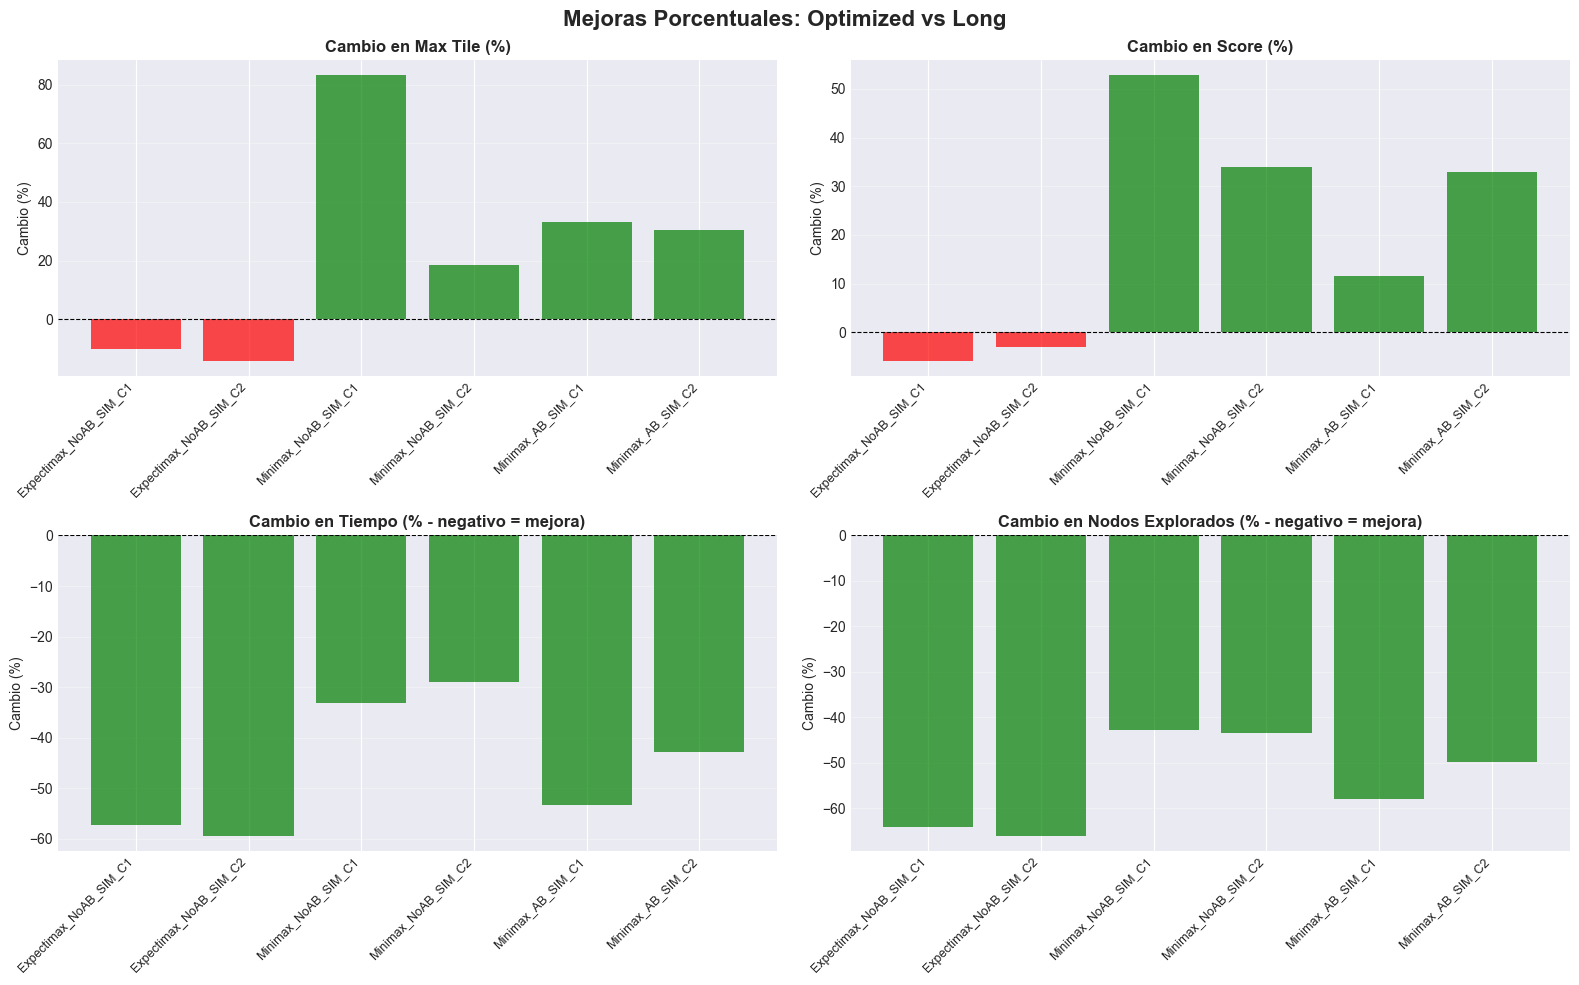

Gráfico de mejoras porcentuales generado


In [6]:
# Gráfico de mejoras porcentuales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

x = np.arange(len(labels))

# 1. Cambio en Max Tile
colors_tile = ['green' if v >= 0 else 'red' for v in comparison_df['Δ Max Tile (%)']]
axes[0].bar(x, comparison_df['Δ Max Tile (%)'], color=colors_tile, alpha=0.7)
axes[0].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[0].set_title('Cambio en Max Tile (%)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Cambio (%)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

# 2. Cambio en Score
colors_score = ['green' if v >= 0 else 'red' for v in comparison_df['Δ Score (%)']]
axes[1].bar(x, comparison_df['Δ Score (%)'], color=colors_score, alpha=0.7)
axes[1].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[1].set_title('Cambio en Score (%)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Cambio (%)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

# 3. Reducción de Tiempo (% negativo = mejora)
colors_time = ['green' if v < 0 else 'red' for v in comparison_df['Δ Tiempo (%)']]
axes[2].bar(x, comparison_df['Δ Tiempo (%)'], color=colors_time, alpha=0.7)
axes[2].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[2].set_title('Cambio en Tiempo (% - negativo = mejora)', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Cambio (%)')
axes[2].set_xticks(x)
axes[2].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[2].grid(axis='y', alpha=0.3)

# 4. Reducción de Nodos (% negativo = mejora)
colors_nodes = ['green' if v < 0 else 'red' for v in comparison_df['Δ Nodos (%)']]
axes[3].bar(x, comparison_df['Δ Nodos (%)'], color=colors_nodes, alpha=0.7)
axes[3].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[3].set_title('Cambio en Nodos Explorados (% - negativo = mejora)', fontweight='bold', fontsize=12)
axes[3].set_ylabel('Cambio (%)')
axes[3].set_xticks(x)
axes[3].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[3].grid(axis='y', alpha=0.3)

fig.suptitle('Mejoras Porcentuales: Optimized vs Long', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('results/percentage_improvements.png', dpi=300, bbox_inches='tight')
plt.show()
print("Gráfico de mejoras porcentuales generado")